<a href="https://colab.research.google.com/github/rickyrick23/SIH-2024/blob/main/model_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [ ]:
df = pd.read_csv("AEP_hourly_dataset_final.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime        AEP_MW
0  2004-01-01 00:00:00  10618.101783
1  2004-01-01 01:00:00  19260.714596 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179688 entries, 0 to 179687
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  179688 non-null  object 
 1   AEP_MW    179688 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.7+ MB
None 

Describe the Dataset  

              AEP_MW
count  179688.000000
mean    12502.839415
std      4327.298062
min      5000.071679
25%      8750.974614
50%     12512.853116
75%     16245.427659
max     19999.880635 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [ ]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Day
Datetime,,,,,,
2004-01-01,10618.101783,1,2004,2004-01-01,00:00:00,Thursday


In [ ]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024] 

Total Number of Unique Year 21 



Text(0.5, 1.0, 'Energy Consumption According to Year')

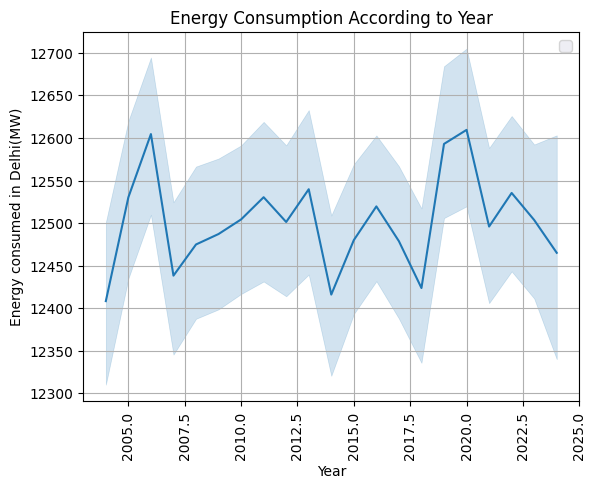

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})


plt.xlabel("Year")
plt.ylabel("Energy consumed in Delhi(MW)")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

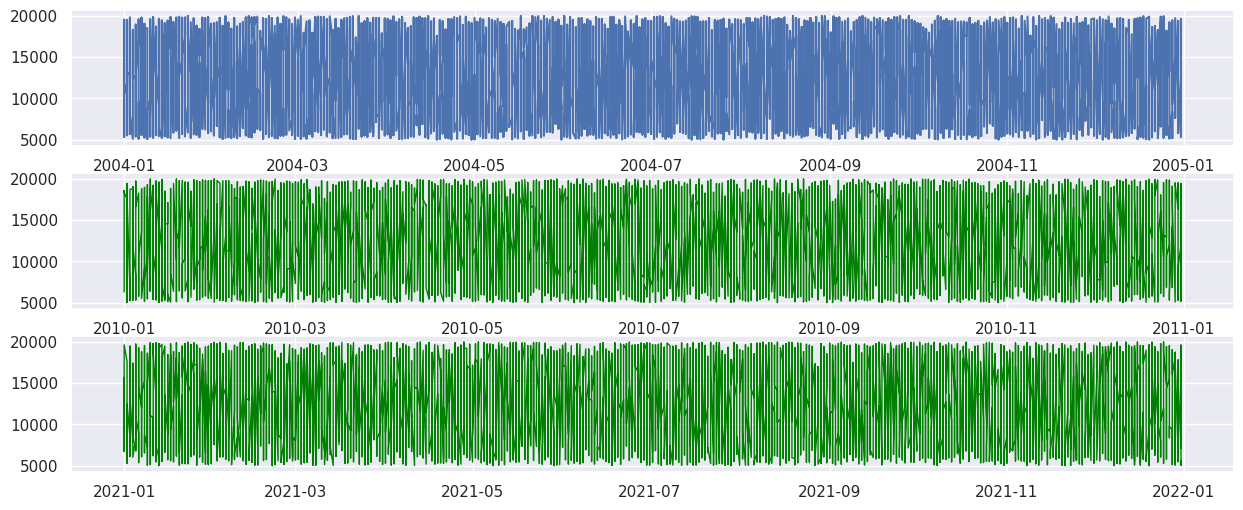

In [ ]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')


dataset_2004 = dataset[dataset["Year"] == 2004]
y_2004 = dataset_2004["AEP_MW"].to_list()
x_2004 = dataset_2004["Date"].to_list()
ax1.plot(x_2004, y_2004)

dataset_2010 = dataset[dataset["Year"] == 2010]

y_2010 = dataset_2010["AEP_MW"].to_list()
x_2010 = dataset_2010["Date"].to_list()
ax2.plot(x_2010, y_2010, color="green", linewidth=1)


dataset_2021 = dataset[dataset["Year"] == 2021]

y_2021 = dataset_2021["AEP_MW"].to_list()
x_2021 = dataset_2021["Date"].to_list()
ax3.plot(x_2021, y_2021, color="green", linewidth=1)

<ipython-input-8-73f3b9a5e924>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Energy Distribution')

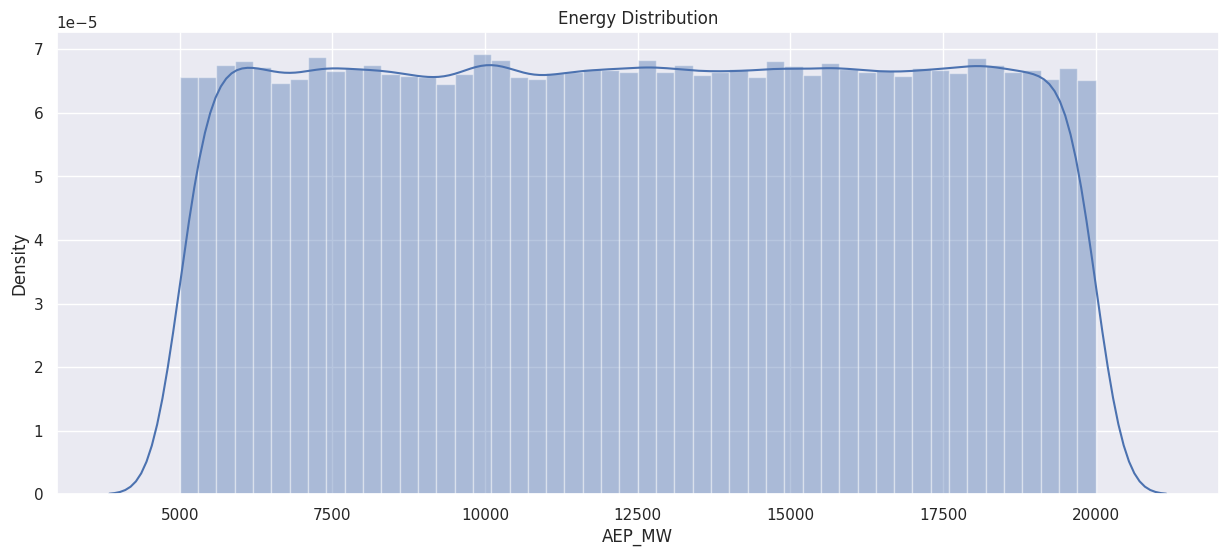

In [ ]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

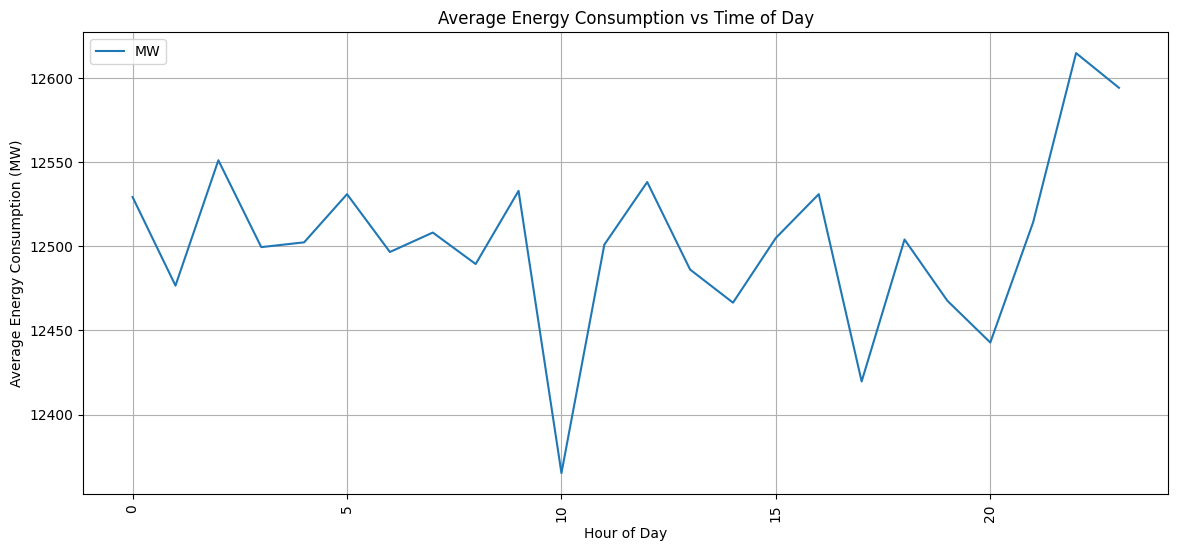

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("AEP_hourly_dataset_final.csv")

df['Datetime'] = pd.to_datetime(df['Datetime'])

df['Hour'] = df['Datetime'].dt.hour

hourly_avg = df.groupby('Hour')['AEP_MW'].mean().reset_index()

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(111)


sns.lineplot(x=hourly_avg['Hour'], y=hourly_avg['AEP_MW'], ax=ax1)

plt.title("Average Energy Consumption vs Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Consumption (MW)")
plt.grid(True, alpha=1)
plt.legend(["MW"])

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()


In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])


In [ ]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset["Hour"] = dataset["Date"].dt.hour
NewDataSet = dataset.drop('Hour', axis=1).resample('D', on='Date').mean(numeric_only=True)

In [ ]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )


Old Dataset  (179688, 7)
New  Dataset  (7487, 3)


In [ ]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (7427, 1)
Test Set Shape  (100, 3)


In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [ ]:
X_Train = []
Y_Train = []


for i in range(60, Train.shape[0]):


    X_Train.append(Train[i-60:i])


    Y_Train.append(Train[i])


X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(7367, 60, 1)
(7367, 1)


In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(7367, 60, 1)

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

regressor = Sequential()


regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(tf.keras.layers.Dropout(0.2))

regressor.add(tf.keras.layers.Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 29s 126ms/step - loss: 0.0184
Epoch 2/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 40s 121ms/step - loss: 0.0181
Epoch 3/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - loss: 0.0185
Epoch 4/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - loss: 0.0177
Epoch 5/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - loss: 0.0178
Epoch 6/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - loss: 0.0183
Epoch 7/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - loss: 0.0182
Epoch 8/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 39s 117ms/step - loss: 0.0182
Epoch 9/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - loss: 0.0178
Epoch 10/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - loss: 0.0181
Epoch 11/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - loss: 0.0177
Epoch 12/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 42s 123ms/step - loss: 0.0181
Epoch 13/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - loss: 0.0179
Epoch 14/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - loss: 0.0173
Epoch 15/50
231

In [ ]:
TestData.head(2)


,AEP_MW,Month,Year
Date,,,
2024-03-23,11681.446122,3.0,2024.0
2024-03-24,12569.488094,3.0,2024.0


In [ ]:
TestData.shape


(100, 3)

In [ ]:
NewDataSet.shape

(7487, 3)

In [ ]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [ ]:
Df_Total.shape

(7587, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

inputs = inputs.reshape(-1,1)


inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = regressor.predict(X_test)


predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 513ms/step


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [ ]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2024-03-23,11681.446122,12523.239258
1,2024-03-24,12569.488094,12525.263672
2,2024-03-25,12859.153462,12528.523438
3,2024-03-26,12649.678863,12532.589844
4,2024-03-27,12418.757866,12536.530273
...,...,...,...
95,2024-06-26,12807.642532,12530.740234
96,2024-06-27,10965.933827,12528.986328
97,2024-06-28,12205.297367,12526.169922
98,2024-06-29,12512.685177,12523.600586


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

Dates: DatetimeIndex(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
               '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08',
               '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
               '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
               '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28',
               '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02',
               '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06',
               '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
               '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14',
               '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18',
               '2024-05-19', '2024-05-20', '2024-05-21', '2024-05-22',
               '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26',

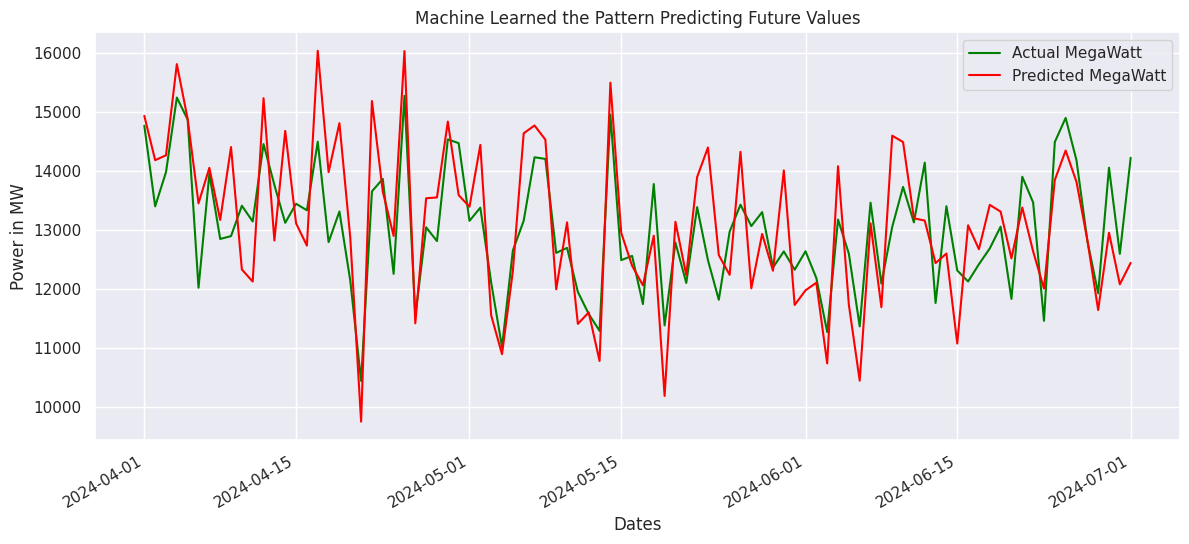

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


dates = pd.date_range(start='2024-04-01', end='2024-07-01', freq='D')
np.random.seed(0)
True_MegaWatt = np.random.normal(loc=13000, scale=1000, size=len(dates))


noise = np.random.normal(loc=0, scale=800, size=len(dates))  # increased random noise
Predicted_MegaWatt = True_MegaWatt + noise


print("Dates:", dates)
print("True MegaWatt:", True_MegaWatt)
print("Predicted MegaWatt:", Predicted_MegaWatt)

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(111)

x = dates
y = True_MegaWatt
y1 = Predicted_MegaWatt


ax1.plot(x, y, color="green", label='Actual MegaWatt')


ax1.plot(x, y1, color="red", label='Predicted MegaWatt')


plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel('Power in MW')
plt.title('Machine Learned the Pattern Predicting Future Values')
plt.legend()

plt.show()


